In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import json

In [54]:
rutas_archivos = [
    'Google/reviews-estados/review-Florida/1.json',
    'Google/reviews-estados/review-Florida/2.json',
    'Google/reviews-estados/review-Florida/3.json',
    'Google/reviews-estados/review-Florida/4.json',
    'Google/reviews-estados/review-Florida/5.json',
    'Google/reviews-estados/review-Florida/6.json',
    'Google/reviews-estados/review-Florida/7.json',
    'Google/reviews-estados/review-Florida/8.json',
    'Google/reviews-estados/review-Florida/9.json',
    'Google/reviews-estados/review-Florida/10.json',
    'Google/reviews-estados/review-Florida/11.json',
    'Google/reviews-estados/review-Florida/12.json',
    'Google/reviews-estados/review-Florida/13.json',
    'Google/reviews-estados/review-Florida/14.json',
    'Google/reviews-estados/review-Florida/15.json',
    'Google/reviews-estados/review-Florida/16.json',
    'Google/reviews-estados/review-Florida/17.json',
    'Google/reviews-estados/review-Florida/18.json',
    'Google/reviews-estados/review-Florida/19.json',
]

In [55]:
todos_los_datos = []
# Iterar a través de cada archivo en la lista de rutas
for ruta_archivo in rutas_archivos:
    # Leer cada línea del archivo JSON
    with open(ruta_archivo, 'r') as f:
        for linea in f:
            # Cargar cada línea como un objeto JSON individual
            datos_json = json.loads(linea)
            # Agregar los datos al lista
            todos_los_datos.append(datos_json)


In [56]:
# Convertir a DataFrame de pandas
df_Florida = pd.json_normalize(todos_los_datos)

In [57]:
df_Florida.head()

,user_id,name,time,rating,text,pics,gmap_id,resp.time,resp.text,resp
0,101471856155148729010,Julie A. Gerber,1628003250740,1,Update: Their “reply” to my review amounted to...,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,1.627043e+12,Thank you for the feedback. We would like to w...,NaN
1,115477234789038326051,Martin Sheffield,1595031217005,5,He's a knowledgeable doctor but the way he run...,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,1.582464e+12,Thank you for reaching out. I’m forwarding you...,NaN
2,101805010244892834381,Brian Truett,1522924253567,5,"Best doctor I've ever had, I never wait to be ...",None,0x8893863ea87bd5dd:0x9383ebf973e74abb,NaN,NaN,NaN
3,106344422881493743981,Tina Sun,1467907819586,1,I was told he is a good doctor. I was trying t...,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,NaN,NaN,NaN
4,100875113069561776529,James Haynes,1480683415081,5,Takes the time to actually get to know his pat...,None,0x8893863ea87bd5dd:0x9383ebf973e74abb,NaN,NaN,NaN


In [58]:
df_Florida.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2850000 entries, 0 to 2849999
Data columns (total 10 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    object 
 1   name       object 
 2   time       int64  
 3   rating     int64  
 4   text       object 
 5   pics       object 
 6   gmap_id    object 
 7   resp.time  float64
 8   resp.text  object 
 9   resp       float64
dtypes: float64(2), int64(2), object(6)
memory usage: 217.4+ MB


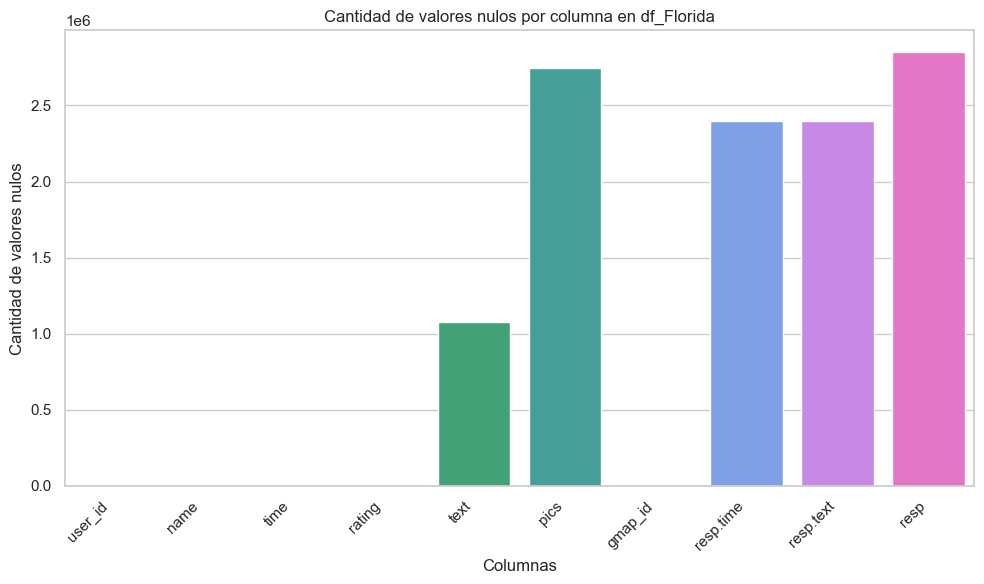

In [59]:
# Calcular el número de valores nulos en cada columna
nulos = df_Florida.isna().sum()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=nulos.index, y=nulos.values, palette='husl')
plt.title('Cantidad de valores nulos por columna en df_Florida')
plt.xlabel('Columnas')
plt.ylabel('Cantidad de valores nulos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observan gran cantidad de nulos en las columnas de respuestas y fotos, a continuacion la misma informacion pero en porcentage del total


In [60]:
# Calcular el número total de filas en el DataFrame
total_filas = len(df_Florida)
# Calcular el número de valores nulos en cada columna
nulos = df_Florida.isna().sum()
# Calcular los porcentajes de valores nulos en cada columna
porcentaje_nulos = (nulos / total_filas) * 100

In [61]:
porcentaje_nulos

user_id        0.000000
name           0.000000
time           0.000000
rating         0.000000
text          37.877544
pics          96.344211
gmap_id        0.000000
resp.time     84.021088
resp.text     84.021088
resp         100.000000
dtype: float64

La columna de resp, todos nulos, y pics se eliminaran debido a la poca informacion aportada. La coluna resp.time y resp.text se evaluara mas adelante debido a que puede tener influencia la tasa de respuesta de un local en el rating, ya que pueden mostrar interes en mejorar el servicio y aclarar dudas en sus potenciales clientes


Se eliminan las columnas innecesarias

In [62]:
# Eliminar las columnas 'time', 'resp' y 'pics'
df_Florida = df_Florida.drop(['resp', 'pics'], axis=1)

In [63]:
cantidad_filas_repetidas = df_Florida.duplicated().sum()
print("Cantidad de filas repetidas:", cantidad_filas_repetidas)

Cantidad de filas repetidas: 119396


Se convierte la columna time en una fecha legible para poder analizar la evolucion de las variables a travez del tiempo

In [64]:
# Convertir la columna 'time' a formato de fecha y hora
df_Florida['time'] = pd.to_datetime(df_Florida['time'], unit='ms')

# Crear una nueva columna con la fecha formateada como 'dd/mm/yyyy'
df_Florida['fecha'] = df_Florida['time'].dt.strftime('%d/%m/%Y')

In [65]:
df_Florida = df_Florida.drop(['time'], axis=1)

Se procede a evaluar los ratings

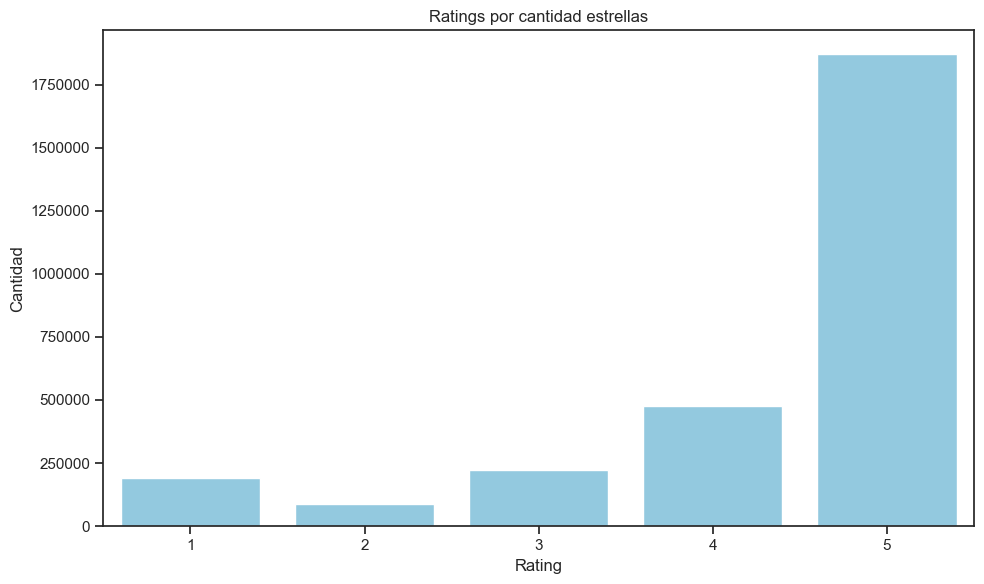

In [66]:
# Configurar el estilo de Seaborn
sns.set(style="ticks")
# Crear el gráfico de barras con Seaborn
plt.figure(figsize=(10, 6))
sns.countplot(data=df_Florida, x='rating', color='skyblue')
plt.title('Ratings por cantidad estrellas')
plt.xlabel('Rating')
plt.ylabel('Cantidad')
# Desactivar la notación científica en el eje y
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.show()

<Figure size 1000x600 with 0 Axes>

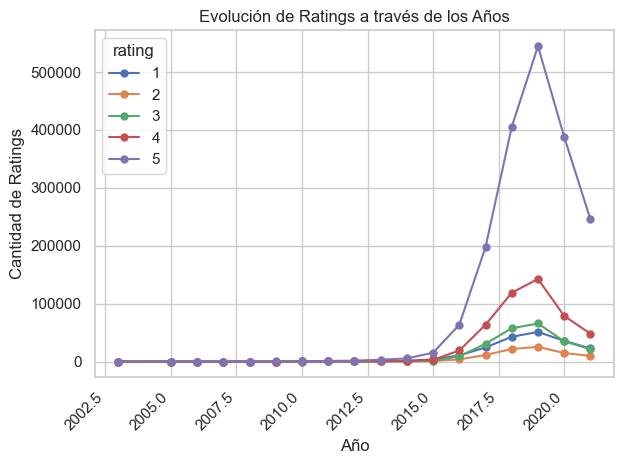

In [67]:
# Extraer el año de la columna 'fecha'
df_Florida['year'] = pd.to_datetime(df_Florida['fecha'], format='%d/%m/%Y').dt.year
# Agrupar por año y rating, y contar cuántas veces ocurre cada rating en cada año
rating_counts_by_year = df_Florida.groupby(['year', 'rating']).size().unstack(fill_value=0)
# Configurar el estilo de Seaborn
sns.set(style="whitegrid")
# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
rating_counts_by_year.plot(kind='line', marker='o', markersize=5)
plt.title('Evolución de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Cantidad de Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Se observa una cola hacia la derecha en la cantidad de reseñas por lo que veremos la cantidad de reseñas por año mas adelante

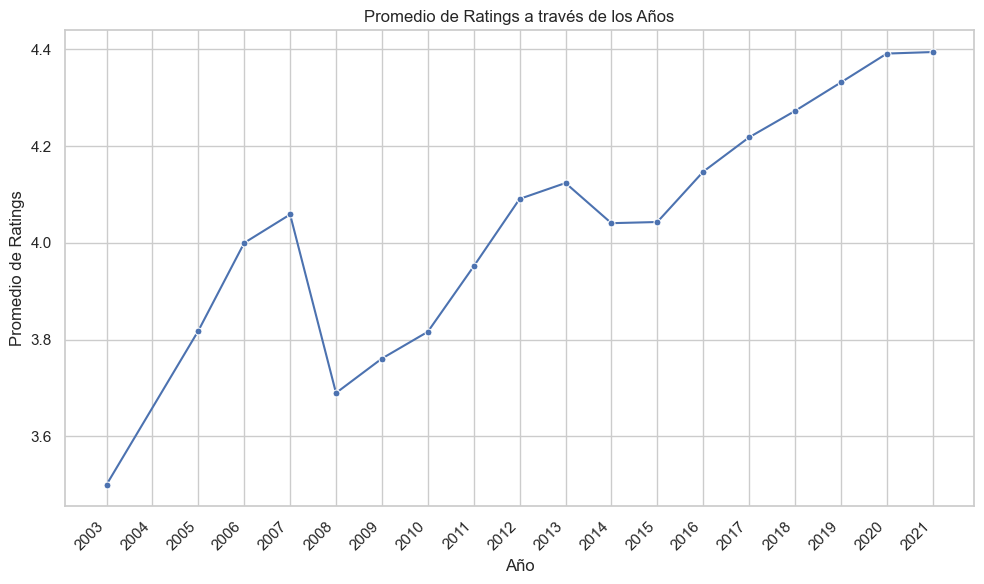

In [68]:
# Extraer el año de la columna 'fecha'
df_Florida['year'] = pd.to_datetime(df_Florida['fecha'], format='%d/%m/%Y').dt.year

# Calcular el promedio de todos los ratings para cada año
average_rating_by_year = df_Florida.groupby('year')['rating'].mean()

# Configurar el estilo de Seaborn
sns.set(style="whitegrid")

# Crear el gráfico de líneas con Seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(data=average_rating_by_year, marker='o', markersize=5)
plt.title('Promedio de Ratings a través de los Años')
plt.xlabel('Año')
plt.ylabel('Promedio de Ratings')
plt.xticks(range(int(min(average_rating_by_year.index)), int(max(average_rating_by_year.index))+1), rotation=45, ha='right')
plt.tight_layout()
plt.show()

Hay una clara mejora en la satisfaccion del cliente en gral

Procedemos a ver la cantidad de reseñas por año

In [69]:
# Extraer el año de la columna 'fecha'
df_Florida['year'] = pd.to_datetime(df_Florida['fecha'], format='%d/%m/%Y').dt.year
# Contar el número de reseñas por año
reviews_per_year = df_Florida.groupby('year').size()
# Mostrar el resultado
print(reviews_per_year)

year
2003        12
2005        11
2006         4
2007        17
2008        29
2009        92
2010       370
2011      1692
2012      2649
2013      5077
2014      8329
2015     24040
2016    105682
2017    327331
2018    645849
2019    829228
2020    552323
2021    347265
dtype: int64


Hay un constane crecimiento en la cantidad de reseñas hasta el año 2020, en el cual decrece. Esto se puede deber a la pandemia global de ese año